<a href="https://colab.research.google.com/github/THODESAIPRAJWAL/stockmarket-prediction/blob/main/nlponstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install langdetect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install praw


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# General data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Send a GET request to the endpoimport requests
import pandas as pd
from langdetect import detect
from datetime import datetime, timedelta


# API libraries/credentials
import config
import yfinance as yf
import tweepy
import praw

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('stopwords')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# ML libraries
from sklearn import linear_model as lm
import statsmodels
import statsmodels.api

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import pandas as pd
from langdetect import detect
from datetime import datetime, timedelta

# Define the endpoint URL and API key
endpoint_url = 'https://newsapi.org/v2/everything'
api_key = '68cc114e48bc4acf8ddf616c0656ca6c'

# Calculate the date range for the last 15 days
today = datetime.today()
last_15_days = today - timedelta(days=15)
from_date = last_15_days.strftime('%Y-%m-%d')
to_date = today.strftime('%Y-%m-%d')

# Define the parameters for the API request
params = {
    'q': 'tesla',
    'from': from_date,
    'to': to_date,
    'sortBy': 'publishedAt',
    'language': 'en',
    'apiKey': api_key
}

# Send a GET request to the endpoint with the parameters
response = requests.get(endpoint_url, params=params)

# Check the status code of the response to make sure it was successful
if response.status_code == 200:
    # Extract the articles from the response
    articles = response.json()['articles']
    
    # Format the articles into the desired attributes and remove non-English articles
    formatted_articles = []
    for article in articles:
        try:
            if detect(article['title'] + ' ' + article['content']) == 'en':
                # Extract only the date from the publishedAt field
                published_date = article['publishedAt'][:10]

                formatted_article = {
                    'publishedAt': published_date,
                    'description': article['description'],
                    'author': article['author'],
                    'content': article['content'],
                    'source.id': article['source']['id'] if article['source'] else None,
                    'source.name': article['source']['name'] if article['source'] else None,
                    'title': article['title'],
                    'url': article['url']
                }
                formatted_articles.append(formatted_article)
        except:
            pass
    
    # Convert the formatted articles to a dataframe
    Newsdf = pd.DataFrame.from_records(formatted_articles)

    # Print the dataframe
    print(Newsdf)
else:
    print('Error getting news articles from News API')


   publishedAt                                        description  \
0   2023-03-06  Adidas has been planning its Web3 strategy for...   
1   2023-03-06  (marketscreener.com) Australian shares ended h...   
2   2023-03-06  Tesla Inc. cut the prices of its Model S and M...   
3   2023-03-06  (Bloomberg) -- Tesla Inc. slashed prices of it...   
4   2023-03-06  has cut prices of its Model S and Model X vehi...   
..         ...                                                ...   
95  2023-03-05  Brits who live in the newly proposed ULEZ expa...   
96  2023-03-05  Brits who live in the newly proposed ULEZ expa...   
97  2023-03-05  Let us say that you’re speculating in a certai...   
98  2023-03-05  Oh, the Irony A broken clock is, as they say, ...   
99  2023-03-05  Seven years ago, I put down my AU$1500 deposit...   

                     author  \
0               Nica Osorio   
1                   Reuters   
2           marketwatch.com   
3   Dana Hull and Danny Lee   
4               

In [ ]:
Newsdf

,publishedAt,description,author,content,source.id,source.name,title,url
0,2023-03-06,Adidas has been planning its Web3 strategy for...,Nica Osorio,When American electric vehicle maker Tesla ann...,None,International Business Times,Europe's Largest Sportswear Manufacturer Adida...,https://www.ibtimes.com/europes-largest-sports...
1,2023-03-06,(marketscreener.com) Australian shares ended h...,Reuters,*\r\nBanks and tech stocks lead gains\r\n*\r\n...,None,Marketscreener.com,Australian shares begin week on a positive not...,https://www.marketscreener.com/news/latest/Aus...
2,2023-03-06,Tesla Inc. cut the prices of its Model S and M...,marketwatch.com,Tesla Inc. cut the prices of its Model S and M...,None,Biztoc.com,Tesla cuts prices for Model S and Model X in U...,https://biztoc.com/x/2657ab561ad12942
3,2023-03-06,(Bloomberg) -- Tesla Inc. slashed prices of it...,Dana Hull and Danny Lee,(Bloomberg) -- Tesla Inc. slashed prices of it...,None,Yahoo Entertainment,"Tesla Slashes Prices of Model S, Model X in US...",https://finance.yahoo.com/news/tesla-slashes-p...
4,2023-03-06,has cut prices of its Model S and Model X vehi...,reuters.com,Tesla Inc (TSLA.O) has cut prices of its Model...,None,Biztoc.com,Tesla cuts prices of Model S and Model X varia...,https://biztoc.com/x/79001cc2230642a9
...,...,...,...,...,...,...,...,...
95,2023-03-05,Brits who live in the newly proposed ULEZ expa...,Milica Cosic,The Ultra Low Emission Zone is set to expand t...,None,This is Money,Victims of ULEZ: Woman facing £650 year costs ...,https://www.thisismoney.co.uk/money/cars/artic...
96,2023-03-05,Brits who live in the newly proposed ULEZ expa...,Milica Cosic,The Ultra Low Emission Zone is set to expand t...,None,This is Money,Victims of ULEZ: Woman facing £650 year costs ...,https://www.thisismoney.co.uk/money/cars/artic...
97,2023-03-05,Let us say that you’re speculating in a certai...,ERIC KIM,Let us say that youre speculating in a certain...,None,Erickimphotography.com,2 cents to 2 dollars?,https://erickimphotography.com/blog/2023/03/05...
98,2023-03-05,"Oh, the Irony A broken clock is, as they say, ...",Noor Al-Sibai,"Sometimes, we unfortunately have to hand it to...",None,Futurism,Elon Musk Roasts Dudes Pivoting From Crypto to AI,https://futurism.com/the-byte/elon-musk-roasts...


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
aapl = yf.Ticker("aapl")

In [ ]:
aapl.history(period='30d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-23 00:00:00-05:00,137.909435,143.101520,137.689769,140.894882,81760300,0.00,0.0
2023-01-24 00:00:00-05:00,140.096097,142.941758,140.086117,142.312714,66435100,0.00,0.0
2023-01-25 00:00:00-05:00,140.675215,142.212861,138.598384,141.643738,65799300,0.00,0.0
2023-01-26 00:00:00-05:00,142.951735,144.030091,141.683667,143.740540,54105100,0.00,0.0
2023-01-27 00:00:00-05:00,142.941753,147.005541,142.861874,145.707520,70555800,0.00,0.0
2023-01-30 00:00:00-05:00,144.739016,145.328113,142.632232,142.781998,64015300,0.00,0.0
2023-01-31 00:00:00-05:00,142.482450,144.119949,142.063092,144.070023,65874500,0.00,0.0
2023-02-01 00:00:00-05:00,143.750517,146.386491,141.104563,145.208282,77663600,0.00,0.0
2023-02-02 00:00:00-05:00,148.673001,150.949524,147.944119,150.590088,118339000,0.00,0.0


In [ ]:
stocksDf = aapl.history(start='2023-02-27', end='2023-03-7', actions=False)
stocksDf.index = pd.to_datetime(stocksDf.index.date)


In [ ]:
stocksDf

,Open,High,Low,Close,Volume
2023-02-27,147.710007,149.169998,147.449997,147.919998,44998500
2023-02-28,147.050003,149.080002,146.830002,147.410004,50547000
2023-03-01,146.830002,147.229996,145.009995,145.309998,55479000
2023-03-02,144.380005,146.710007,143.899994,145.910004,52238100
2023-03-03,148.039993,151.110001,147.330002,151.029999,70668500
2023-03-06,153.789993,156.300003,153.460007,153.830002,87410100


In [ ]:
## coverting the datatype of description from object to string

Newsdf['description']=Newsdf['description'].astype(str)
Newsdf
News_dummy=Newsdf
   

## droping out duplicate news articles 

Newsdf =Newsdf.drop_duplicates('description')

In [ ]:
## total count of every column

Newsdf.count()

publishedAt    92
description    92
author         83
content        92
source.id       8
source.name    92
title          92
url            92
dtype: int64

In [ ]:
## sorting the data according to dates

Newsdf = Newsdf.sort_values(['publishedAt'])

In [ ]:
Newsdf['publishedAt'].describe()

## shows that, are there any articles missing in a month which can be said from the # unique values.

count             92
unique             2
top       2023-03-06
freq              61
Name: publishedAt, dtype: object

In [ ]:
Newsdf['source.name'].describe()

count             92
unique            35
top       Biztoc.com
freq              21
Name: source.name, dtype: object

In [ ]:
Newsdf['source.name'].unique()

## out of 100 news article there are 28 unique sources which have given the artice on APPLE in last 30 days.

array(['CleanTechnica', 'Biztoc.com', 'Screen Rant', 'Slashdot.org',
       'Yahoo Entertainment', 'Motley Fool Australia', 'USA Today',
       'Decrypt', 'OilPrice.com', 'Motley Fool', 'Erickimphotography.com',
       'This is Money', 'Page Six', 'Futurism', "Barron's",
       'Marketscreener.com', 'Gizmodo Australia', 'Tech Times', 'Forbes',
       'Seeking Alpha', 'Www.gov.uk', 'Autocar', 'Nature.com',
       'International Business Times', 'CNA', 'Investing.com', 'Livemint',
       'FX Empire', 'Reuters', 'TechCrunch', 'Moneycontrol',
       'MarketWatch', 'The Times of India', 'Socialmediaexplorer.com',
       'Google News'], dtype=object)

In [ ]:
Newsdf.head(10)

,publishedAt,description,author,content,source.id,source.name,title,url
99,2023-03-05,"Seven years ago, I put down my AU$1500 deposit...",David Waterworth,"Seven years ago, I put down my AU$1500 deposit...",None,CleanTechnica,"Tess Hits 100,000",https://cleantechnica.com/2023/03/05/tesla-mod...
64,2023-03-05,Vietnam’s biggest company enters tepid market ...,ft.com,Vietnams biggest company enters tepid market t...,None,Biztoc.com,VinFast delivers EVs to US drivers in first fo...,https://biztoc.com/x/61d009fb5ac0e6ef
65,2023-03-05,Needing a break from the hustle and bustle of ...,David Waterworth,Needing a break from the hustle and bustle of ...,None,CleanTechnica,Our Tesla Model 3 Goes To The High Country,https://cleantechnica.com/2023/03/05/our-tesla...
66,2023-03-05,Vietnamese automaker VinFast has begun deliver...,Michael Akuchie,The VinFastVF8 is now being delivered to custo...,None,Screen Rant,VinFast VF8: Everything You Need To Know About...,https://screenrant.com/vinfast-vf8-specs-featu...
67,2023-03-05,"Tesla recalls 3,470 Model Y vehicles produced ...",feedfeeder,Genetics explains why you look like your fathe...,None,Slashdot.org,"Tesla recalls 3,470 Model Y vehicles produced ...",https://slashdot.org/firehose.pl?op=view&amp;i...
68,2023-03-05,Current and former employees of the company sa...,BBC,"Marianna Spring goes to San Francisco, home of...",None,Yahoo Entertainment,Twitter can’t protect you from trolls any more...,https://finance.yahoo.com/news/twitter-t-prote...
71,2023-03-05,Fund managers will be buying up the stocks for...,Tony Yoo,Investors are advised to watch four ASX shares...,None,Motley Fool Australia,These 4 ASX shares could rocket this month: He...,https://www.fool.com.au/2023/03/06/these-4-asx...
72,2023-03-05,Tesla is recalling thousands of Model Y vehicl...,fortune.com,Tesla is recalling thousands of Model Y vehicl...,None,Biztoc.com,Tesla is recalling thousands of Model Ys,https://biztoc.com/x/cacfbdd0e6dfd627
74,2023-03-05,Tesla is recalling thousands of Model Ys—and t...,feedfeeder,"If I were a grave-digger or even a hangman, th...",None,Slashdot.org,Tesla is recalling thousands of Model Ys—and t...,https://slashdot.org/firehose.pl?op=view&amp;i...
75,2023-03-05,Tesla is recalling 2022-2023 Model Y vehicles ...,"USA TODAY, Jordan Mendoza, USA TODAY",Tesla is recalling thousands of its newer Mode...,usa-today,USA Today,Tesla recalls thousands of Model Y vehicles ov...,https://www.usatoday.com/story/money/cars/2023...


In [ ]:
yz = pd.DataFrame(Newsdf.groupby('source.name').count())
yz
## this shows how many articles were written about

,publishedAt,description,author,content,source.id,title,url
source.name,,,,,,,
Autocar,1,1,0,1,0,1,1
Barron's,2,2,2,2,0,2,2
Biztoc.com,21,21,21,21,0,21,21
CNA,4,4,0,4,0,4,4
CleanTechnica,4,4,4,4,0,4,4
Decrypt,1,1,1,1,0,1,1
Erickimphotography.com,2,2,2,2,0,2,2
FX Empire,2,2,2,2,0,2,2
Forbes,1,1,1,1,0,1,1


In [ ]:
Newsdf['author'].describe()

count          83
unique         57
top       Reuters
freq           11
Name: author, dtype: object

In [ ]:
# author of the article who has writen max articles on apple.

Newsdf.groupby('author').count()

,publishedAt,description,content,source.id,source.name,title,url
author,,,,,,,
Adam,1,1,1,0,1,1,1
Al Root,1,1,1,0,1,1,1
Alex Kimani,1,1,1,0,1,1,1
Andrew Bary,1,1,1,0,1,1,1
BBC,1,1,1,0,1,1,1
Bloomberg,1,1,1,0,1,1,1
Charlotte Yang,1,1,1,0,1,1,1
Dana Hull and Danny Lee,1,1,1,0,1,1,1
Danny Lee,1,1,1,0,1,1,1


In [ ]:
!pip install matplotlib
!pip install plotly
!pip install pandas
!pip install requests
!pip install textblob
!pip install vaderSentiment
!pip install seaborn
!pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## packages need to be imported

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import plot

import plotly.graph_objs as go
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize
import datetime as DT
import requests
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import matplotlib.animation as animation
from nltk.corpus import stopwords

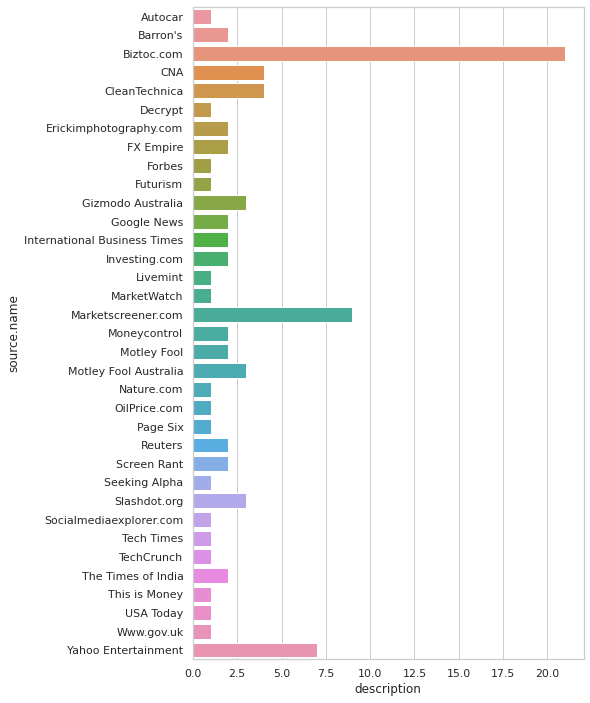

In [ ]:
plt.figure(figsize =(7,12))
sb.set(style = 'whitegrid')

sb.barplot( x = yz['description'], y = yz.index)
plt.savefig('ArticlesWrittenBySource.png')
plt.show()

In [ ]:
##TO check NA values
Newsdf['description'][pd.isnull(Newsdf['description']) == True]

Series([], Name: description, dtype: object)

In [ ]:
xy = pd.DataFrame(Newsdf.groupby('publishedAt').count())
xy
## this shows how many articles were written about Apple on a particular day.

,description,author,content,source.id,source.name,title,url
publishedAt,,,,,,,
2023-03-05,31,31,31,1,31,31,31
2023-03-06,61,52,61,7,61,61,61


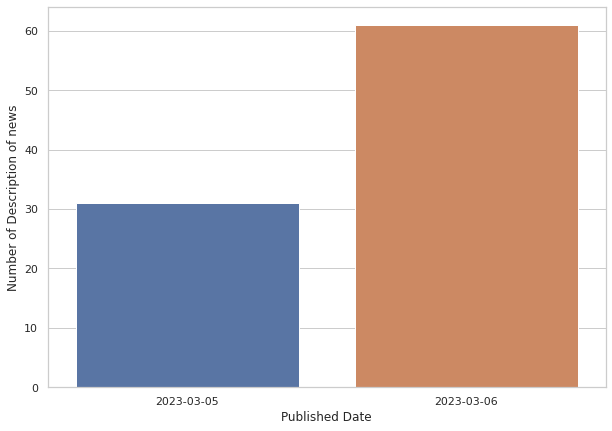

In [ ]:
plt.figure(figsize =(10,7))
ax = sb.barplot( x = xy.index , y = xy['description'])
ax.set(xlabel = 'Published Date', ylabel = 'Number of Description of news')
plt.show()

In [ ]:
#lowercase
Newsdf['description']= Newsdf['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Newsdf['description'].head()

99    seven years ago, i put down my au$1500 deposit...
64    vietnam’s biggest company enters tepid market ...
65    needing a break from the hustle and bustle of ...
66    vietnamese automaker vinfast has begun deliver...
67    tesla recalls 3,470 model y vehicles produced ...
Name: description, dtype: object

In [ ]:
## word count 

Newsdf['word_count'] = Newsdf['description'].apply(lambda x: len(str(x).split(" ")))
Newsdf[['description','word_count']].head()

,description,word_count
99,"seven years ago, i put down my au$1500 deposit...",46
64,vietnam’s biggest company enters tepid market ...,15
65,needing a break from the hustle and bustle of ...,49
66,vietnamese automaker vinfast has begun deliver...,22
67,"tesla recalls 3,470 model y vehicles produced ...",41


In [ ]:
###stop words count
from nltk.corpus import stopwords
stop = stopwords.words('english')
Newsdf['stopwords'] = Newsdf['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
Newsdf[['description','stopwords']].head()

,description,stopwords
99,"seven years ago, i put down my au$1500 deposit...",16
64,vietnam’s biggest company enters tepid market ...,3
65,needing a break from the hustle and bustle of ...,22
66,vietnamese automaker vinfast has begun deliver...,9
67,"tesla recalls 3,470 model y vehicles produced ...",10


In [ ]:
###stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
Newsdf['description'] = Newsdf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
Newsdf['description'][0]

'adidas planning web3 strategy several months product months-long building, brand recently launched nft collection future web3 projects.'

In [ ]:
# of numerics

Newsdf['numerics'] = Newsdf['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Newsdf['numerics']


99    0
64    0
65    0
66    0
67    0
     ..
28    0
27    0
25    0
23    0
48    0
Name: numerics, Length: 92, dtype: int64

In [ ]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [ ]:
Newsdf=Newsdf.reset_index()

In [ ]:
Newsdf_description=Newsdf[['description','publishedAt']]
Newsdf_description

,description,publishedAt
0,"seven years ago, put au$1500 deposit sat tight...",2023-03-05
1,vietnam’s biggest company enters tepid market ...,2023-03-05
2,"needing break hustle bustle big city, headed h...",2023-03-05
3,vietnamese automaker vinfast begun deliveries ...,2023-03-05
4,"tesla recalls 3,470 model vehicles produced pa...",2023-03-05
...,...,...
87,(marketscreener.com) tesla cuts price model x ...,2023-03-06
88,byd's $18 billion rout shows fallout tesla pri...,2023-03-06
89,(bloomberg) -- price war among electric vehicl...,2023-03-06
90,"prices tesla's model cars cut $5,000. prices p...",2023-03-06


In [ ]:
for i in range(0,len(Newsdf)):
    
    
    Newsdf_description['description'][i]=_removeNonAscii(Newsdf_description['description'][i])

<ipython-input-40-308ff6ebfd03>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Newsdf_description

,description,publishedAt
0,"seven years ago, put au$1500 deposit sat tight...",2023-03-05
1,vietnams biggest company enters tepid market h...,2023-03-05
2,"needing break hustle bustle big city, headed h...",2023-03-05
3,vietnamese automaker vinfast begun deliveries ...,2023-03-05
4,"tesla recalls 3,470 model vehicles produced pa...",2023-03-05
...,...,...
87,(marketscreener.com) tesla cuts price model x ...,2023-03-06
88,byd's $18 billion rout shows fallout tesla pri...,2023-03-06
89,(bloomberg) -- price war among electric vehicl...,2023-03-06
90,"prices tesla's model cars cut $5,000. prices p...",2023-03-06


In [ ]:
import re


In [ ]:
for i in range(0, len(Newsdf_description)):
    Newsdf_description.at[i, 'description'] = clean_text(Newsdf_description.at[i, 'description'])


In [ ]:
Newsdf_description

,description,publishedAt
0,seven years ago put au deposit sat tight anxi...,2023-03-05
1,vietnams biggest company enters tepid market h...,2023-03-05
2,needing break hustle bustle big city headed hi...,2023-03-05
3,vietnamese automaker vinfast begun deliveries ...,2023-03-05
4,tesla recalls model vehicles produced past y...,2023-03-05
...,...,...
87,marketscreener com tesla cuts price model x aw...,2023-03-06
88,byd is billion rout shows fallout tesla price...,2023-03-06
89,bloomberg price war among electric vehicle mak...,2023-03-06
90,prices tesla is model cars cut prices perfor...,2023-03-06


In [ ]:
analyser = SentimentIntensityAnalyzer()
neg=[]
pos=[]
neu=[]
compound=[]


for i in range(0,len(Newsdf_description)):
    #print(i)
    sentence=Newsdf_description['description'][i]
    scores= analyser.polarity_scores(sentence)
    
    pos.append(scores['pos'])
    neg.append(scores['neg'])
    
    neu.append(scores['neu'])
    compound.append(scores['compound'])
   
Newsdf_description['positive']=pos 
Newsdf_description['negative']=neg
Newsdf_description['neutral']=neu
Newsdf_description['compound']=compound
    

Newsdf_description


<ipython-input-45-8f5dc4828bb4>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-8f5dc4828bb4>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-8f5dc4828bb4>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-8f5d

,description,publishedAt,positive,negative,neutral,compound
0,seven years ago put au deposit sat tight anxi...,2023-03-05,0.094,0.058,0.848,0.2960
1,vietnams biggest company enters tepid market h...,2023-03-05,0.000,0.000,1.000,0.0000
2,needing break hustle bustle big city headed hi...,2023-03-05,0.164,0.178,0.658,-0.1027
3,vietnamese automaker vinfast begun deliveries ...,2023-03-05,0.177,0.000,0.823,0.4215
4,tesla recalls model vehicles produced past y...,2023-03-05,0.000,0.138,0.862,-0.5165
...,...,...,...,...,...,...
87,marketscreener com tesla cuts price model x aw...,2023-03-06,0.000,0.185,0.815,-0.6808
88,byd is billion rout shows fallout tesla price...,2023-03-06,0.000,0.281,0.719,-0.5994
89,bloomberg price war among electric vehicle mak...,2023-03-06,0.000,0.187,0.813,-0.5994
90,prices tesla is model cars cut prices perfor...,2023-03-06,0.000,0.244,0.756,-0.4939


In [ ]:
## to check whether the article is negative by a human reading

Newsdf['description'][50]

"cut prices model model x vehicles u.s., website showed, days chief executive elon musk said recent price cuts models stoked demand. prices tesla's model cars cut $5,000. basic ve…"

In [ ]:
dummy_News=Newsdf_description.groupby('publishedAt')[['compound']].mean()

In [ ]:
##The Compound score is a metric that calculates the sum of all the lexicon ratings 
#which have been normalized between -1(most extreme negative) and +1 (most extreme positive). 

dummy_News

,compound
publishedAt,
2023-03-05,0.061903
2023-03-06,-0.078590


In [ ]:
## sentiment compounded score.

import plotly.graph_objs as go
import plotly.offline as py
senti = [go.Scatter( x = dummy_News.index, y = dummy_News['compound'] )]

layout1 = dict(title = 'Sentiment Score Plot')

fig = dict (data = senti, layout = layout1)
py.iplot(fig)

In [ ]:
## OHLC Apple stock data


trace = go.Ohlc (x = stocksDf.index, open = stocksDf['Open'], high = stocksDf['High'],low = stocksDf['Low'], close = stocksDf['Close'])
data = [trace]

layout ={ 'title' : 'APPLE STOCK IN LAST MONTH',
            'yaxis' : {'title' : 'Apple stock value'}
        }
fig = dict(data = data, layout = layout)
py.iplot(fig)

In [ ]:
## only close value

close = [go.Scatter( x = stocksDf.index, y = stocksDf['Close'] )]

layout = dict(title = 'Closing price')

fig = dict (data = close, layout = layout)
py.iplot(fig)

In [ ]:
## concatinating sentiment score and stock data

dummy_combined = pd.merge(dummy_News,stocksDf, left_index=True, right_index=True)

In [ ]:
dummy_combined

,compound,Open,High,Low,Close,Volume
